<a href="https://colab.research.google.com/github/ALIHEBA/DL_Tasks/blob/main/Assignment_2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question.1

In [ ]:
import numpy as np

x = np.array([[30 ,30 ,80 ,100 ,0 ,30],
[0 ,0 ,100 ,80 ,10 ,0],
[30 ,100 ,20 ,90 ,80 ,0],
[100 ,0 ,80 ,20 ,20 ,80],
[20 ,70 ,0 ,95 ,100 ,30],
[20 ,0 ,0 ,100 ,0 ,0]])

K= np.array([ [0 ,0 ,1/3],
[0 ,1/3 ,0],
[1/3 ,0 ,0]])

In [ ]:
def calculate_target_size(inp_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if inp size = 224, then up to 223)
    for i in range(inp_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= inp_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [ ]:
def convolve(inp, kernel):
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        inp_size=inp.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_inp = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = inp[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_inp[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_inp

In [ ]:
Z= convolve(x,K)
print(Z)

[[ 36.66666667 100.          33.33333333  43.33333333]
 [100.          33.33333333  60.          33.33333333]
 [ 13.33333333  80.          33.33333333  38.33333333]
 [ 56.66666667   6.66666667  38.33333333  93.33333333]]


## Question.2

The effects of convolving the kernel K with the input matrix x
1. The output size become 4*4 instead of 6*6
2. The input values changed 
3. Intensified and Enhanced

## Question.3

In [ ]:
import torch 
import torch.nn as nn
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
#from vis_utils import *
import random;
import math;
import matplotlib.pyplot as plt
import torchvision
import tqdm



In [ ]:
num_epochs = 5;
#num_epochs = 10;
batch_size = 100;
#batch_size = 1000;
#batch_size = 10000;
learning_rate = 0.001;

In [ ]:
#datatset
train_set = torchvision.datasets.FashionMNIST(
root = './data/FashionMNIST',
download = True,
train = True,
transform = transforms.Compose([transforms.ToTensor(),]))

test_set = torchvision.datasets.FashionMNIST(
root = './data/FashionMNIST',
download=True,train=False,
transform = transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



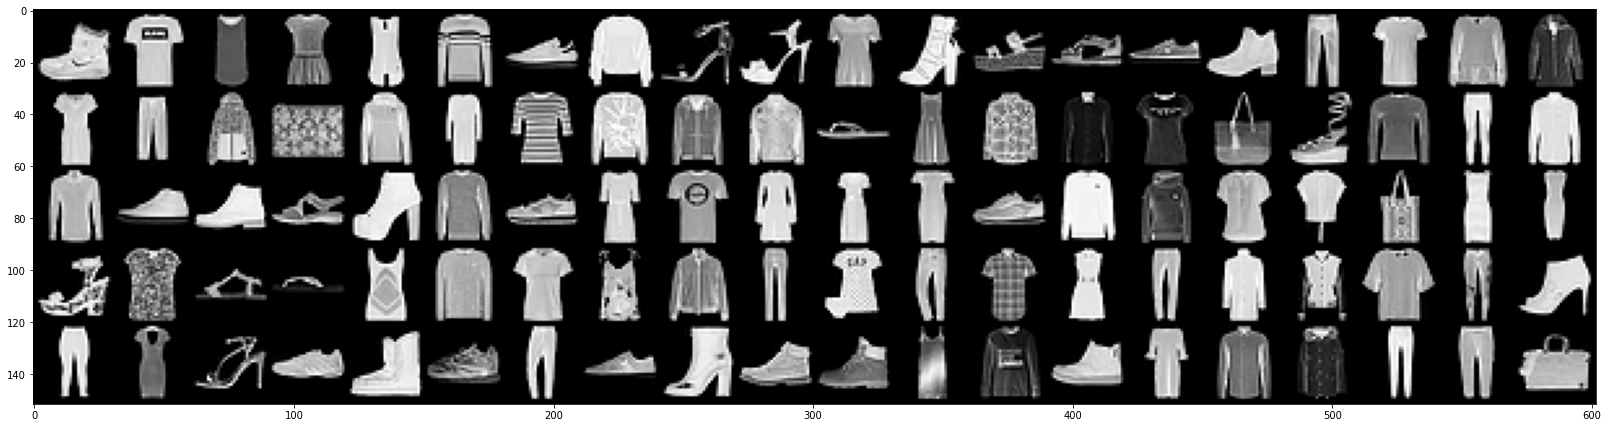

In [ ]:
#data loader
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=batch_size)
images, labels = next(iter(train_loader))

#used to create a grid of images
grid = torchvision.utils.make_grid(images,nrow=20)
plt.figure(figsize=(28,28))
plt.imshow(np.transpose(grid,(1,2,0)),cmap='gray')

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(4*4*64, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out




In [ ]:
from torchsummary import summary
model = CNN()
batch_size = 100
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
       BatchNorm2d-2           [-1, 32, 24, 24]              64
              ReLU-3           [-1, 32, 24, 24]               0
         MaxPool2d-4           [-1, 32, 12, 12]               0
            Conv2d-5             [-1, 64, 8, 8]          51,264
       BatchNorm2d-6             [-1, 64, 8, 8]             128
              ReLU-7             [-1, 64, 8, 8]               0
         MaxPool2d-8             [-1, 64, 4, 4]               0
            Linear-9                   [-1, 10]          10,250
Total params: 62,538
Trainable params: 62,538
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.56
Params size (MB): 0.24
Estimated Total Size (MB): 0.80
---------------------------------------------

In [ ]:
#instance of the Conv Net
cnn = CNN();#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate);

In [ ]:
losses = [];
for epoch in range(num_epochs):
    for i, (images,targets) in enumerate(train_loader):       
        images = Variable(images)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss);
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_set)//batch_size, loss))
            


Epoch : 1/5, Iter : 100/600,  Loss: 2.2671
Epoch : 1/5, Iter : 200/600,  Loss: 2.2568
Epoch : 1/5, Iter : 300/600,  Loss: 2.2738
Epoch : 1/5, Iter : 400/600,  Loss: 2.2382
Epoch : 1/5, Iter : 500/600,  Loss: 2.2937
Epoch : 1/5, Iter : 600/600,  Loss: 2.2627
Epoch : 2/5, Iter : 100/600,  Loss: 2.2816
Epoch : 2/5, Iter : 200/600,  Loss: 2.2668
Epoch : 2/5, Iter : 300/600,  Loss: 2.2601
Epoch : 2/5, Iter : 400/600,  Loss: 2.2542
Epoch : 2/5, Iter : 500/600,  Loss: 2.2842
Epoch : 2/5, Iter : 600/600,  Loss: 2.2717
Epoch : 3/5, Iter : 100/600,  Loss: 2.2550
Epoch : 3/5, Iter : 200/600,  Loss: 2.2576
Epoch : 3/5, Iter : 300/600,  Loss: 2.2554
Epoch : 3/5, Iter : 400/600,  Loss: 2.2506
Epoch : 3/5, Iter : 500/600,  Loss: 2.2753
Epoch : 3/5, Iter : 600/600,  Loss: 2.2631
Epoch : 4/5, Iter : 100/600,  Loss: 2.2468
Epoch : 4/5, Iter : 200/600,  Loss: 2.2523
Epoch : 4/5, Iter : 300/600,  Loss: 2.2587
Epoch : 4/5, Iter : 400/600,  Loss: 2.2456
Epoch : 4/5, Iter : 500/600,  Loss: 2.2670
Epoch : 4/5

In [ ]:
cnn.eval()
correct = 0
total = 0
for images, targets in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 17.0000 %
Test Accuracy of the model on the 10000 test images: 16.5000 %
Test Accuracy of the model on the 10000 test images: 15.6667 %
Test Accuracy of the model on the 10000 test images: 15.2500 %
Test Accuracy of the model on the 10000 test images: 15.4000 %
Test Accuracy of the model on the 10000 test images: 15.0000 %
Test Accuracy of the model on the 10000 test images: 14.7143 %
Test Accuracy of the model on the 10000 test images: 14.5000 %
Test Accuracy of the model on the 10000 test images: 14.4444 %
Test Accuracy of the model on the 10000 test images: 14.4000 %
Test Accuracy of the model on the 10000 test images: 14.7273 %
Test Accuracy of the model on the 10000 test images: 14.5000 %
Test Accuracy of the model on the 10000 test images: 14.3077 %
Test Accuracy of the model on the 10000 test images: 14.3571 %
Test Accuracy of the model on the 10000 test images: 14.4000 %
Test Accuracy of the model on the 10000 test images: 14

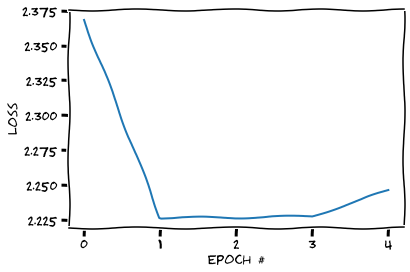

In [ ]:

losses_in_epochs = losses[0::600]
a_tensor = torch.Tensor(losses_in_epochs)

plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(a_tensor);
plt.show();




##Question 4 If the stride increased

if the stride increased this will reduce the output volume and this will consume less memory

##Question.6

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.fc = nn.Linear(12*12*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
from torchsummary import summary
model = CNN()
batch_size = 100
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
       BatchNorm2d-2           [-1, 32, 24, 24]              64
              ReLU-3           [-1, 32, 24, 24]               0
         MaxPool2d-4           [-1, 32, 12, 12]               0
            Linear-5                   [-1, 10]          46,090
Total params: 46,986
Trainable params: 46,986
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.46
Params size (MB): 0.18
Estimated Total Size (MB): 0.64
----------------------------------------------------------------


In [ ]:
#instance of the Conv Net
cnn = CNN();#loss function and optimizer
criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate);

In [ ]:
losses = [];
for epoch in range(num_epochs):
    for i, (images,targets) in enumerate(train_loader):       
        images = Variable(images)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss);
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_set)//batch_size, loss))
            


Epoch : 1/5, Iter : 100/600,  Loss: 2.2935
Epoch : 1/5, Iter : 200/600,  Loss: 2.2492
Epoch : 1/5, Iter : 300/600,  Loss: 2.3099
Epoch : 1/5, Iter : 400/600,  Loss: 2.2957
Epoch : 1/5, Iter : 500/600,  Loss: 2.2964
Epoch : 1/5, Iter : 600/600,  Loss: 2.2836
Epoch : 2/5, Iter : 100/600,  Loss: 2.2740
Epoch : 2/5, Iter : 200/600,  Loss: 2.2453
Epoch : 2/5, Iter : 300/600,  Loss: 2.2632
Epoch : 2/5, Iter : 400/600,  Loss: 2.2468
Epoch : 2/5, Iter : 500/600,  Loss: 2.2830
Epoch : 2/5, Iter : 600/600,  Loss: 2.2825
Epoch : 3/5, Iter : 100/600,  Loss: 2.2422
Epoch : 3/5, Iter : 200/600,  Loss: 2.2315
Epoch : 3/5, Iter : 300/600,  Loss: 2.2504
Epoch : 3/5, Iter : 400/600,  Loss: 2.2327
Epoch : 3/5, Iter : 500/600,  Loss: 2.2713
Epoch : 3/5, Iter : 600/600,  Loss: 2.2817
Epoch : 4/5, Iter : 100/600,  Loss: 2.2285
Epoch : 4/5, Iter : 200/600,  Loss: 2.2168
Epoch : 4/5, Iter : 300/600,  Loss: 2.2321
Epoch : 4/5, Iter : 400/600,  Loss: 2.2192
Epoch : 4/5, Iter : 500/600,  Loss: 2.2692
Epoch : 4/5

In [ ]:
cnn.eval()
correct = 0
total = 0
for images, targets in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 18.0000 %
Test Accuracy of the model on the 10000 test images: 14.5000 %
Test Accuracy of the model on the 10000 test images: 14.6667 %
Test Accuracy of the model on the 10000 test images: 13.5000 %
Test Accuracy of the model on the 10000 test images: 13.6000 %
Test Accuracy of the model on the 10000 test images: 13.3333 %
Test Accuracy of the model on the 10000 test images: 14.0000 %
Test Accuracy of the model on the 10000 test images: 13.7500 %
Test Accuracy of the model on the 10000 test images: 13.0000 %
Test Accuracy of the model on the 10000 test images: 13.1000 %
Test Accuracy of the model on the 10000 test images: 13.0909 %
Test Accuracy of the model on the 10000 test images: 12.9167 %
Test Accuracy of the model on the 10000 test images: 13.0769 %
Test Accuracy of the model on the 10000 test images: 13.2143 %
Test Accuracy of the model on the 10000 test images: 13.1333 %
Test Accuracy of the model on the 10000 test images: 13

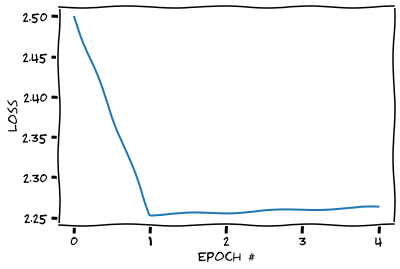

In [ ]:

losses_in_epochs = losses[0::600]
a_tensor = torch.Tensor(losses_in_epochs)

plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(a_tensor);
plt.show();




#SGD Optimizer

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        self.fc = nn.Linear(12*12*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [ ]:
from torchsummary import summary
model = CNN()
batch_size = 1000
#batch_size = 10000

summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
       BatchNorm2d-2           [-1, 32, 24, 24]              64
              ReLU-3           [-1, 32, 24, 24]               0
         MaxPool2d-4           [-1, 32, 12, 12]               0
            Linear-5                   [-1, 10]          46,090
Total params: 46,986
Trainable params: 46,986
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.46
Params size (MB): 0.18
Estimated Total Size (MB): 0.64
----------------------------------------------------------------


In [ ]:
#instance of the Conv Net
cnn = CNN();#loss function and optimizer
criterion = nn.CrossEntropyLoss();
#optimizer = torch.optim.RMSProp(cnn.parameters(), lr=learning_rate);
optimizer = torch.optim.SGD(cnn.parameters(), lr=learning_rate);


In [ ]:
losses = [];
for epoch in range(num_epochs):
    for i, (images,targets) in enumerate(train_loader):       
        images = Variable(images)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss);
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d,  Loss: %.4f' 
                   %(epoch+1, num_epochs, i+1, len(train_set)//batch_size, loss))
            


Epoch : 1/5, Iter : 100/60,  Loss: 2.3169
Epoch : 1/5, Iter : 200/60,  Loss: 2.2775
Epoch : 1/5, Iter : 300/60,  Loss: 2.2567
Epoch : 1/5, Iter : 400/60,  Loss: 2.2688
Epoch : 1/5, Iter : 500/60,  Loss: 2.2975
Epoch : 1/5, Iter : 600/60,  Loss: 2.2768
Epoch : 2/5, Iter : 100/60,  Loss: 2.3026
Epoch : 2/5, Iter : 200/60,  Loss: 2.2654
Epoch : 2/5, Iter : 300/60,  Loss: 2.2506
Epoch : 2/5, Iter : 400/60,  Loss: 2.2605
Epoch : 2/5, Iter : 500/60,  Loss: 2.2816
Epoch : 2/5, Iter : 600/60,  Loss: 2.2705
Epoch : 3/5, Iter : 100/60,  Loss: 2.2977
Epoch : 3/5, Iter : 200/60,  Loss: 2.2583
Epoch : 3/5, Iter : 300/60,  Loss: 2.2483
Epoch : 3/5, Iter : 400/60,  Loss: 2.2575
Epoch : 3/5, Iter : 500/60,  Loss: 2.2719
Epoch : 3/5, Iter : 600/60,  Loss: 2.2655
Epoch : 4/5, Iter : 100/60,  Loss: 2.2940
Epoch : 4/5, Iter : 200/60,  Loss: 2.2527
Epoch : 4/5, Iter : 300/60,  Loss: 2.2464
Epoch : 4/5, Iter : 400/60,  Loss: 2.2553
Epoch : 4/5, Iter : 500/60,  Loss: 2.2649
Epoch : 4/5, Iter : 600/60,  Loss:

In [ ]:
cnn.eval()
correct = 0
total = 0
for images, targets in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 18.0000 %
Test Accuracy of the model on the 10000 test images: 15.0000 %
Test Accuracy of the model on the 10000 test images: 15.3333 %
Test Accuracy of the model on the 10000 test images: 15.7500 %
Test Accuracy of the model on the 10000 test images: 15.2000 %
Test Accuracy of the model on the 10000 test images: 14.5000 %
Test Accuracy of the model on the 10000 test images: 15.0000 %
Test Accuracy of the model on the 10000 test images: 15.0000 %
Test Accuracy of the model on the 10000 test images: 14.6667 %
Test Accuracy of the model on the 10000 test images: 14.7000 %
Test Accuracy of the model on the 10000 test images: 14.3636 %
Test Accuracy of the model on the 10000 test images: 14.2500 %
Test Accuracy of the model on the 10000 test images: 14.6923 %
Test Accuracy of the model on the 10000 test images: 14.7143 %
Test Accuracy of the model on the 10000 test images: 14.8000 %
Test Accuracy of the model on the 10000 test images: 14

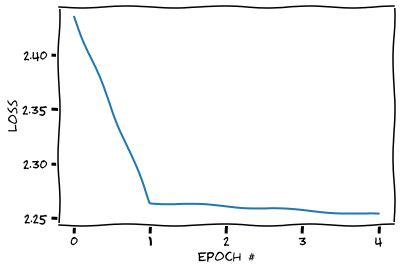

In [ ]:

losses_in_epochs = losses[0::600]
a_tensor = torch.Tensor(losses_in_epochs)

plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(a_tensor);
plt.show();




1. The effect of increasing the batch size on training time: Increasing the training time 

2. The effect of increasing the batch size on training accuracy: Decreasing the training accuracy

3. The effect of increasing the batch size on training loss: Increasing the training loss

